Bu projede covid 19 verileriyle çalıştım ve analizler yaptım.

İlk olarak kullanacağım kütüphaneleri import ederek başlıyorum.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

Veri setimizi okumakla devam ediyoruz.

In [8]:
df = pd.read_csv("covid-data.csv", engine='python')

df.head(5)  #İlk 5 satırı göstermek için kullanılır.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [9]:
df.tail(5)  #Son 5 satırı göstermek için kullanılır.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
232794,ZWE,Africa,Zimbabwe,2022-11-01,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232795,ZWE,Africa,Zimbabwe,2022-11-02,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232796,ZWE,Africa,Zimbabwe,2022-11-03,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232797,ZWE,Africa,Zimbabwe,2022-11-04,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
232798,ZWE,Africa,Zimbabwe,2022-11-05,257893.0,0.0,0.0,5606.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


Data setimiz hakkında daha detaylı bilgilere ulaşmak istiyorum. 

Aşağıdaki adımlarla devam edelim...

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232799 entries, 0 to 232798
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    232799 non-null  object 
 1   continent                                   219658 non-null  object 
 2   location                                    232799 non-null  object 
 3   date                                        232799 non-null  object 
 4   total_cases                                 219693 non-null  float64
 5   new_cases                                   219395 non-null  float64
 6   new_cases_smoothed                          218199 non-null  float64
 7   total_deaths                                200445 non-null  float64
 8   new_deaths                                  200370 non-null  float64
 9   new_deaths_smoothed                         199190 non-null  float64
 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,219693.0,4.532789e+06,2.828932e+07,1.000000,4548.000000,5.053000e+04,5.336100e+05,6.323342e+08
new_cases,219395.0,1.229695e+04,8.483903e+04,0.000000,0.000000,5.200000e+01,9.430000e+02,4.081969e+06
new_cases_smoothed,218199.0,1.233905e+04,8.290994e+04,0.000000,5.857000,9.200000e+01,1.114642e+03,3.436034e+06
total_deaths,200445.0,7.466858e+04,3.835594e+05,1.000000,114.000000,1.199000e+03,9.903000e+03,6.599916e+06
new_deaths,200370.0,1.368085e+02,7.250577e+02,0.000000,0.000000,1.000000e+00,1.400000e+01,1.773100e+04
...,...,...,...,...,...,...,...,...
population,231796.0,1.413489e+08,6.938080e+08,47.000000,896007.000000,6.948395e+06,3.369661e+07,7.975105e+09
excess_mortality_cumulative_absolute,7766.0,4.796967e+04,1.325850e+05,-37726.100000,34.600000,6.009500e+03,3.471957e+04,1.224011e+06
excess_mortality_cumulative,7766.0,9.963914e+00,1.354155e+01,-28.450000,0.560000,7.385000e+00,1.560750e+01,7.655000e+01
excess_mortality,7817.0,1.432574e+01,2.639061e+01,-95.920000,-0.120000,7.270000e+00,1.977000e+01,3.765800e+02


In [12]:
df.dtypes   #data setinin type'ını öğrenmek için kullanılır.

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Data setimiz 67 kolondan oluşmaktadır.

**Eksik Verileri Tespit Etme ve Temizleme**

In [13]:
df.isnull()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232794,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
232795,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
232796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
232797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [14]:
#Şimdi her kolonda sayısal olarak kaç tane eksik değer var onlara bakalım
missing_values_count = df.isnull().sum()

#Şimdi de eksik değerleri sıralayalım
missing_values_count.sort_values(ascending=False)

excess_mortality_cumulative_per_million    225033
excess_mortality_cumulative                225033
excess_mortality_cumulative_absolute       225033
excess_mortality                           224982
weekly_icu_admissions_per_million          224898
                                            ...  
total_cases                                 13106
population                                   1003
date                                            0
location                                        0
iso_code                                        0
Length: 67, dtype: int64

In [15]:
#Toplam kaç tane eksik verimiz var ona bakalım
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

#Eksik verilerin yüzde(%) olarak ne kadar olduğuna bakalım
(total_missing/total_cells) * 100

45.58124672664581

In [16]:
print("--------Her Kolonda Eksik Veri Yüzdesi: --------")
(df.isna().sum()/len(df)*100).apply(lambda x: str(((x*100)//1)/100)+"%")

--------Her Kolonda Eksik Veri Yüzdesi: --------


iso_code                                     0.0%
continent                                   5.64%
location                                     0.0%
date                                         0.0%
total_cases                                 5.62%
                                            ...  
population                                  0.43%
excess_mortality_cumulative_absolute       96.66%
excess_mortality_cumulative                96.66%
excess_mortality                           96.64%
excess_mortality_cumulative_per_million    96.66%
Length: 67, dtype: object

Datasetimiz içerisinde yaklaşık %45.5 eksik veri  olduğunu tespit ettik.

Eksik verilerimizi missingno kütüphanesi ile görselleştirdiğimiz grafik yardımıyla daha net görelim.

<AxesSubplot: >

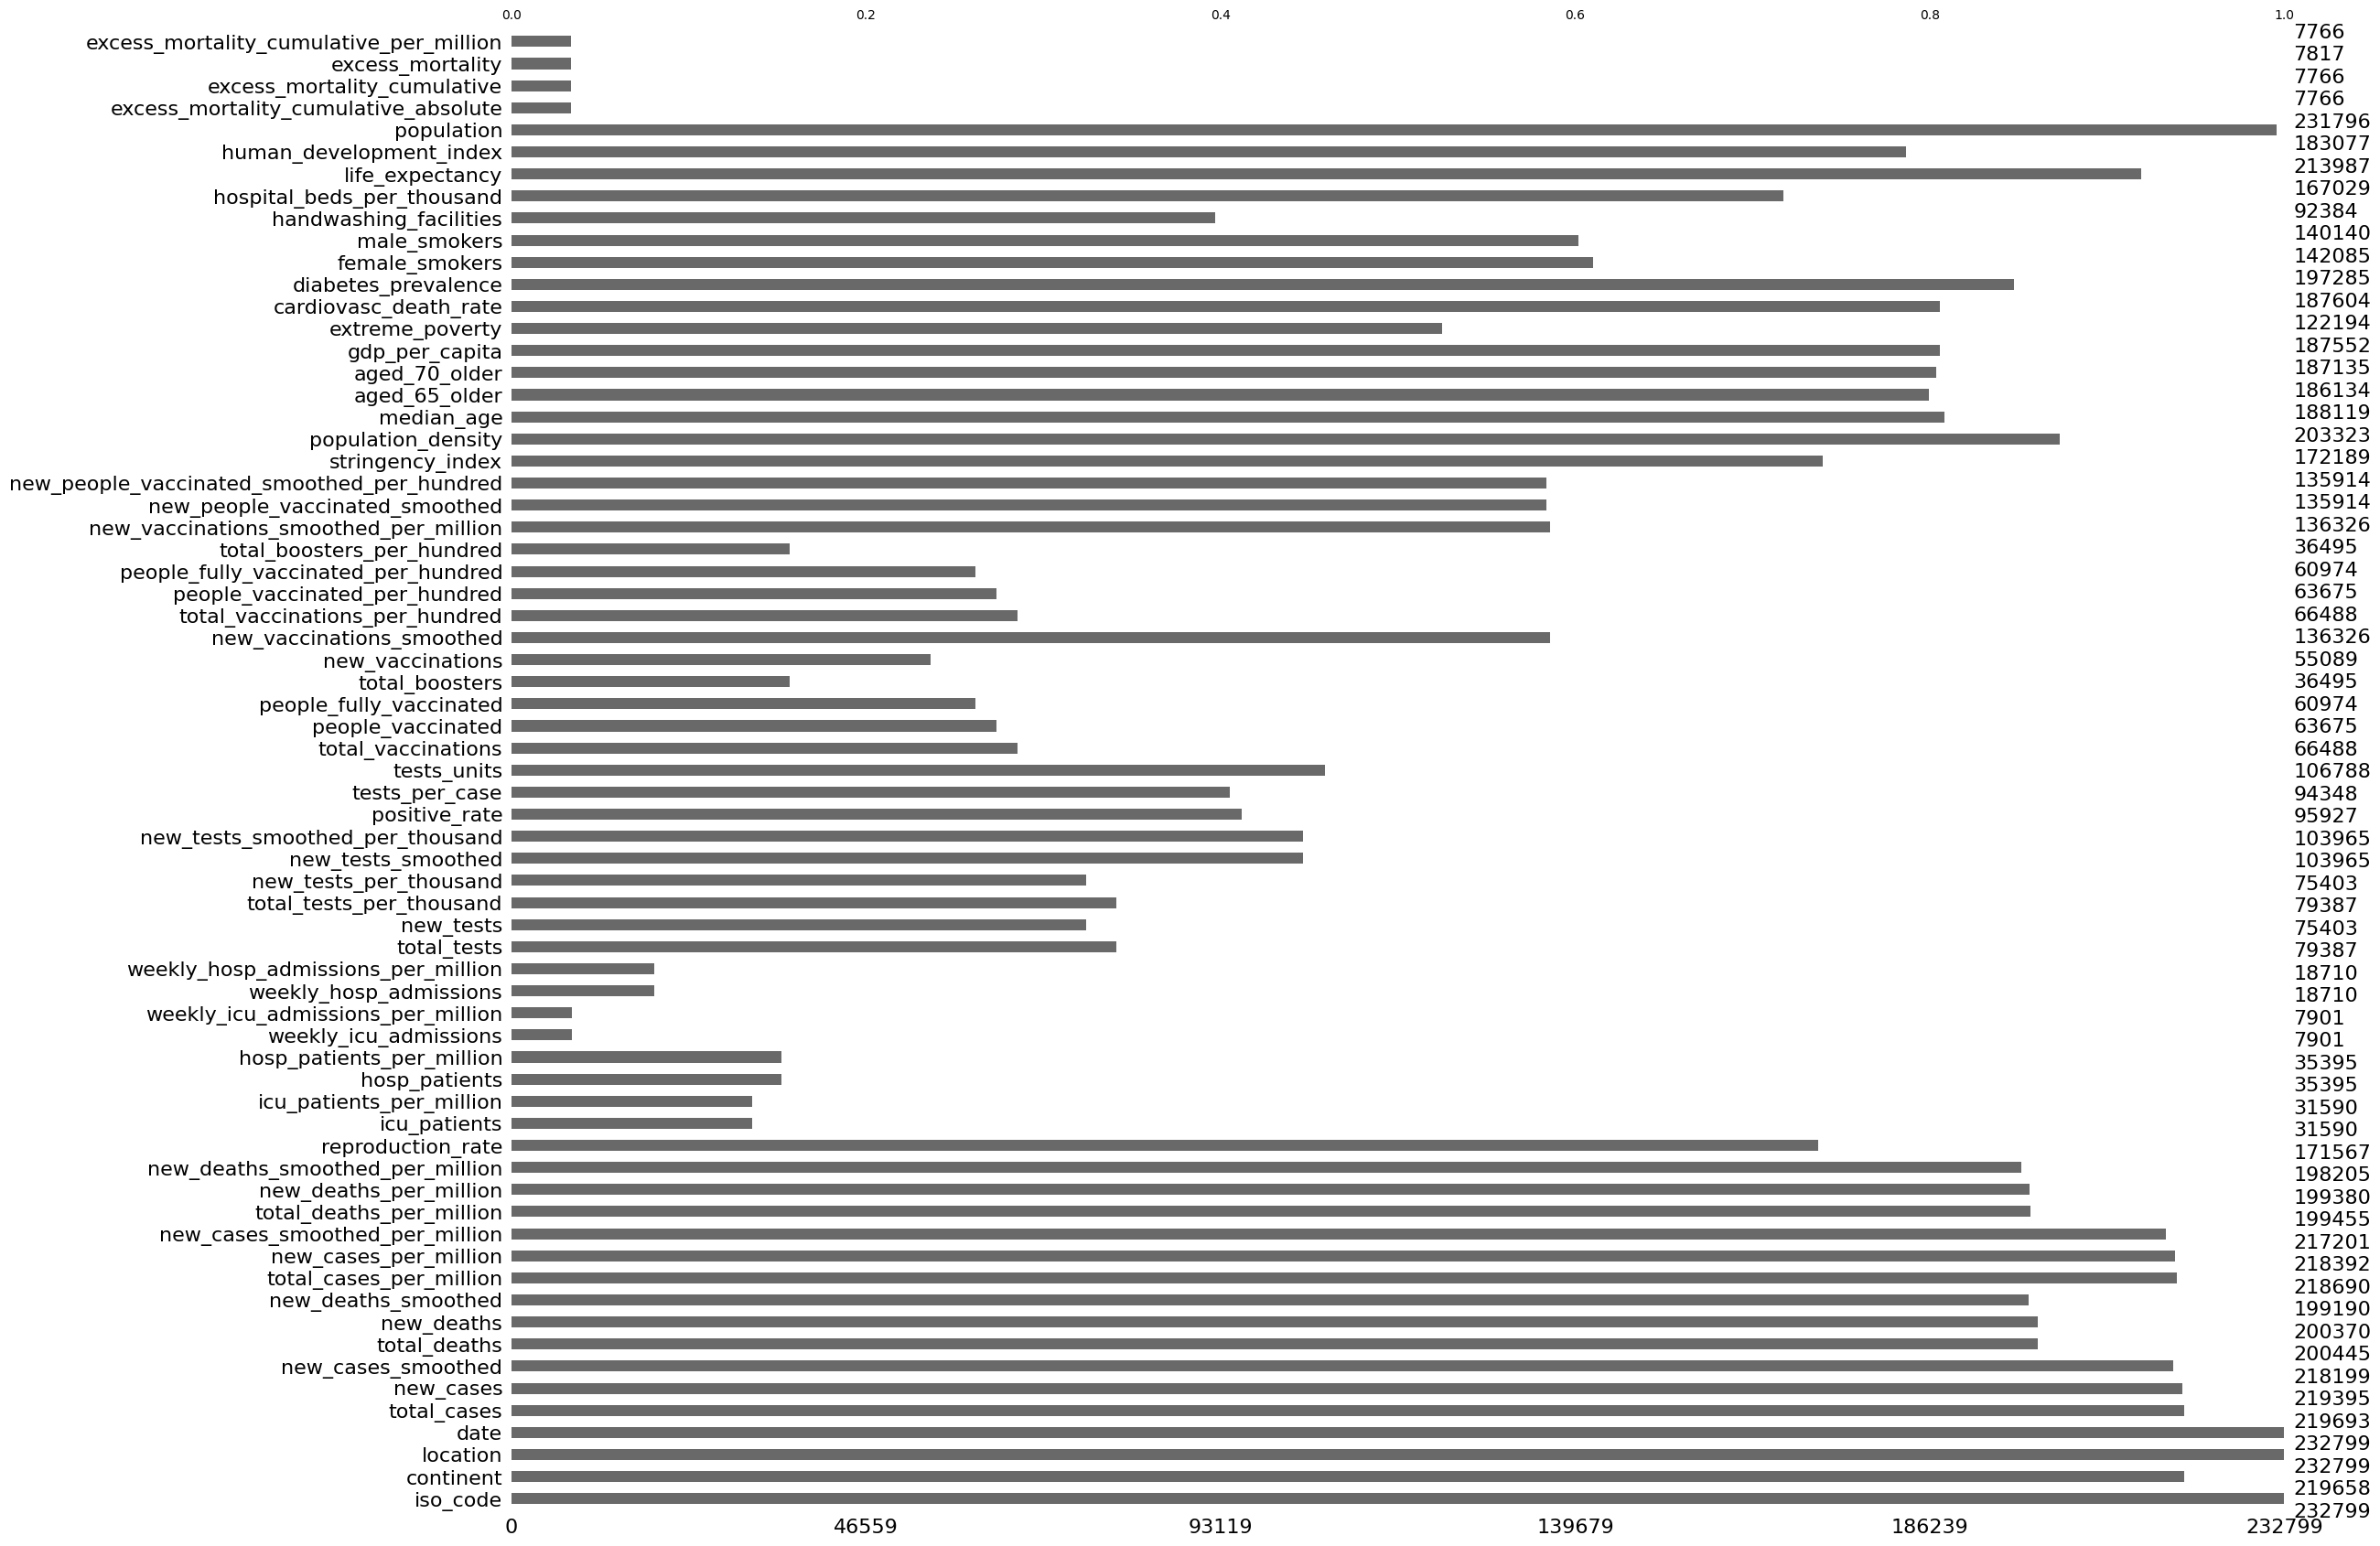

In [17]:
msno.bar(df)

Çubuğun yüksekliği, o sütunun ne kadar eksiksiz olduğunu, yani boş olmayan kaç tane değerin bulunduğunu gösterir.

In [19]:
print("Orijinal veri setinin sütunları : %d \n" % df.shape[1])

Orijinal veri setinin sütunları : 67 



Şimdi anlamlı ve iyi analizler yapabilmek için %60'tan fazla eksik veri bulunan sütunları siliyoruz.

In [20]:
ms_drop = len(df) * .4
df.dropna(thresh = ms_drop, axis = 1, inplace = True)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232794,ZWE,Africa,Zimbabwe,2022-11-01,257893.0,0.0,0.0,5606.0,0.0,0.0,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
232795,ZWE,Africa,Zimbabwe,2022-11-02,257893.0,0.0,0.0,5606.0,0.0,0.0,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
232796,ZWE,Africa,Zimbabwe,2022-11-03,257893.0,0.0,0.0,5606.0,0.0,0.0,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0
232797,ZWE,Africa,Zimbabwe,2022-11-04,257893.0,0.0,0.0,5606.0,0.0,0.0,...,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571,16320539.0


In [21]:
print("Eksik verileri çıkarıldıktan sonraki sütun sayısı : %d" % df.shape[1])

Eksik verileri çıkarıldıktan sonraki sütun sayısı : 41


Datasetimizi temizledikten sonraki grafiğimize bakalım...

<AxesSubplot: >

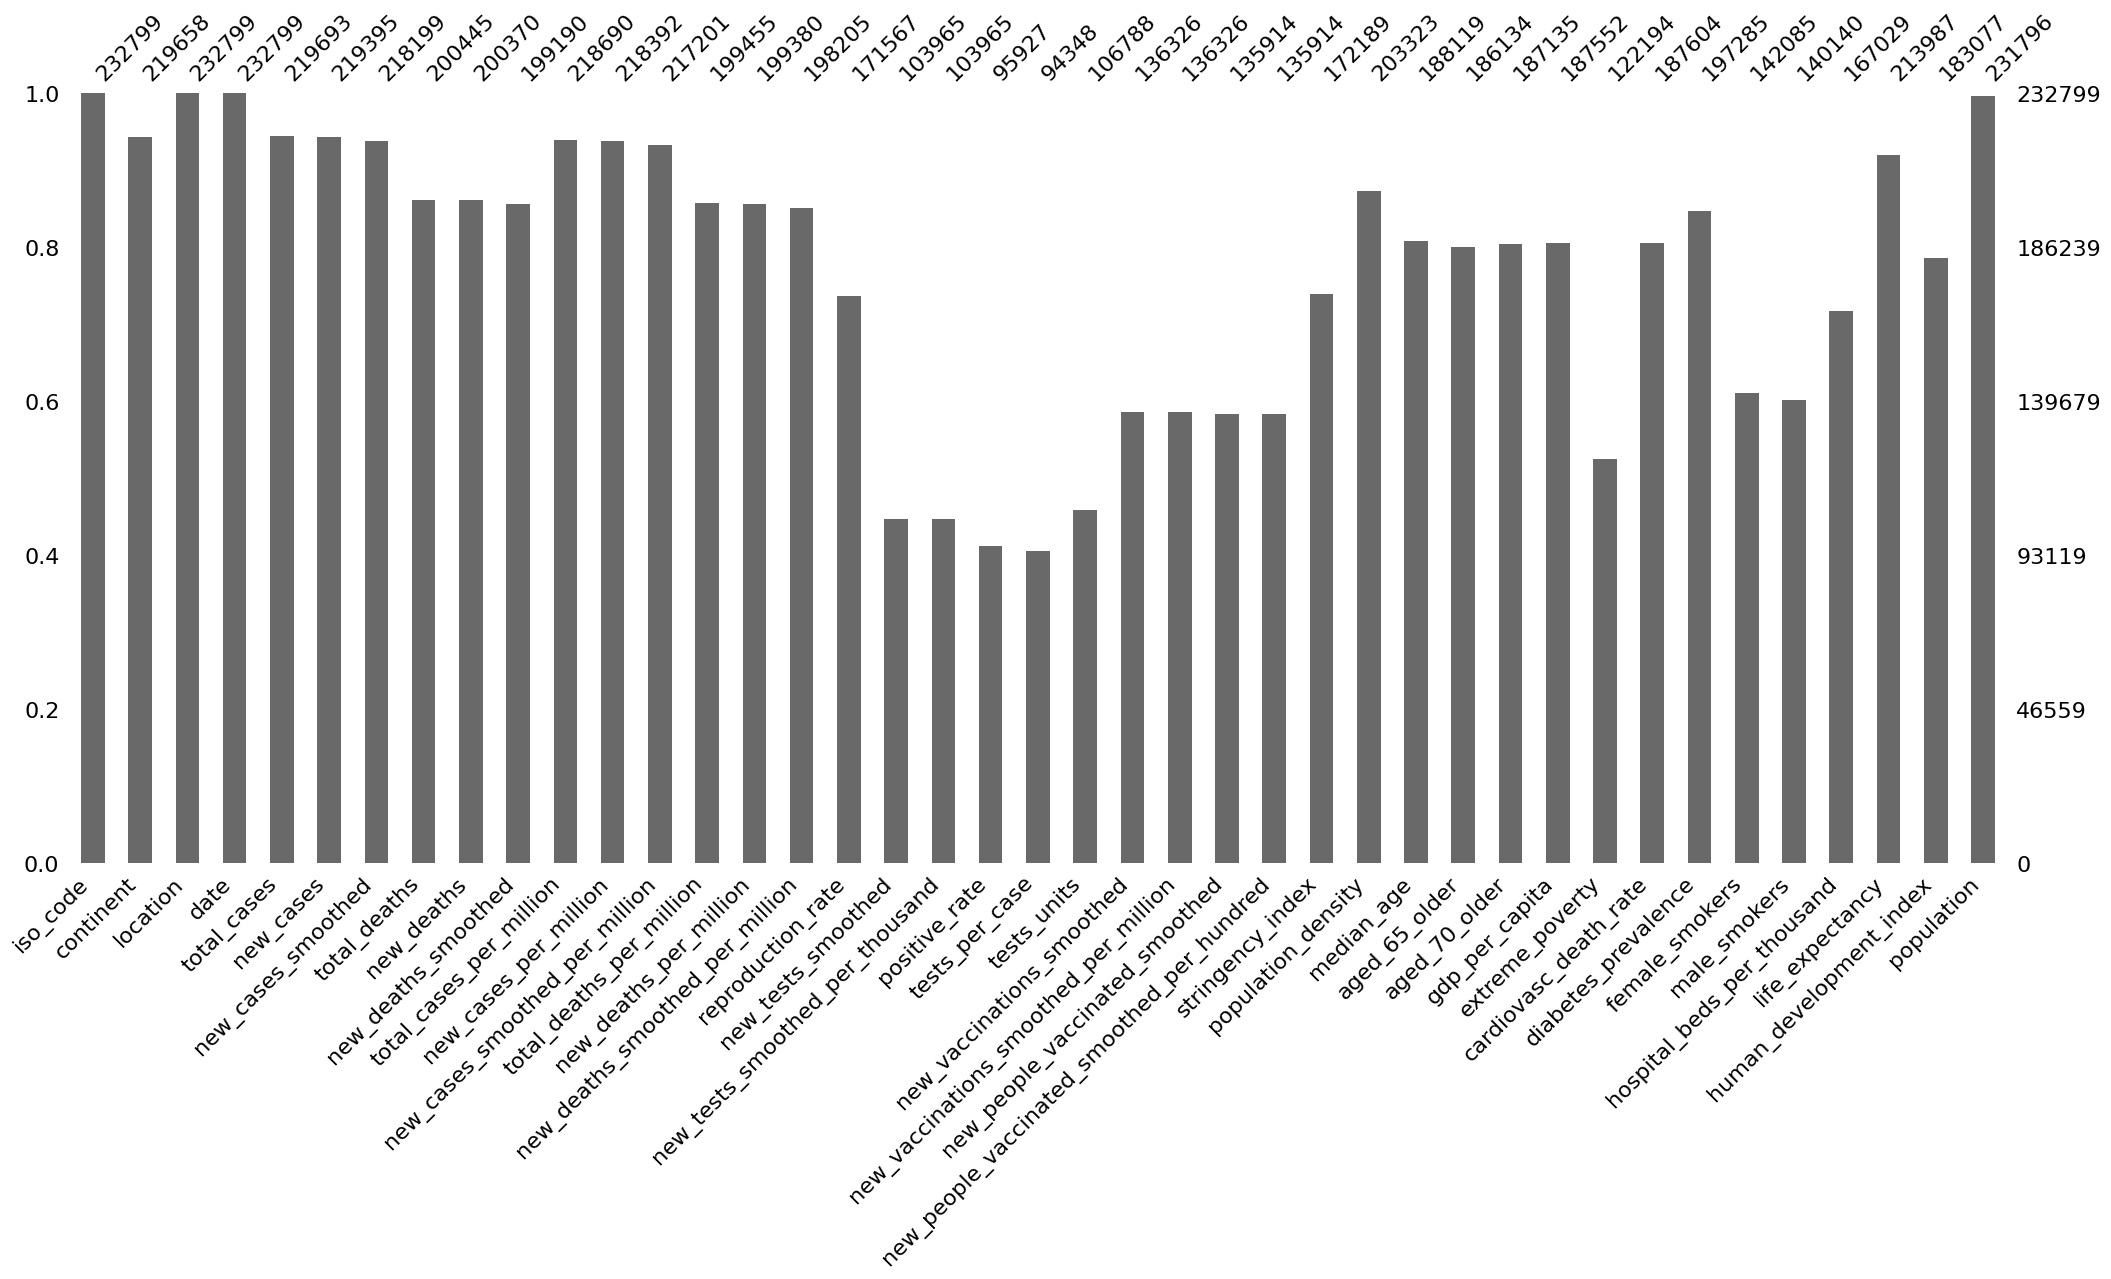

In [22]:
msno.bar(df)

**Analizler**

Analiz_1 : Ülkelere göre günlük vaka sayısı 

In [23]:
daily_cases_ALL = (df
 .sort_values(by = ['location', 'new_cases', 'date'])
 .filter(['location','new_cases','date'])
 .groupby(['location','new_cases'])
 .value_counts()
)

print(daily_cases_ALL)

location     new_cases  date      
Afghanistan  0.0        2020-02-25    1
                        2020-02-26    1
                        2020-07-31    1
                        2020-08-03    1
                        2020-08-10    1
                                     ..
Zimbabwe     5189.0     2021-12-09    1
             5678.0     2021-12-15    1
             7510.0     2021-12-17    1
             9027.0     2021-12-08    1
             9185.0     2021-12-11    1
Length: 219395, dtype: int64


Verilerimizi görselleştirelim

<AxesSubplot: xlabel='date'>

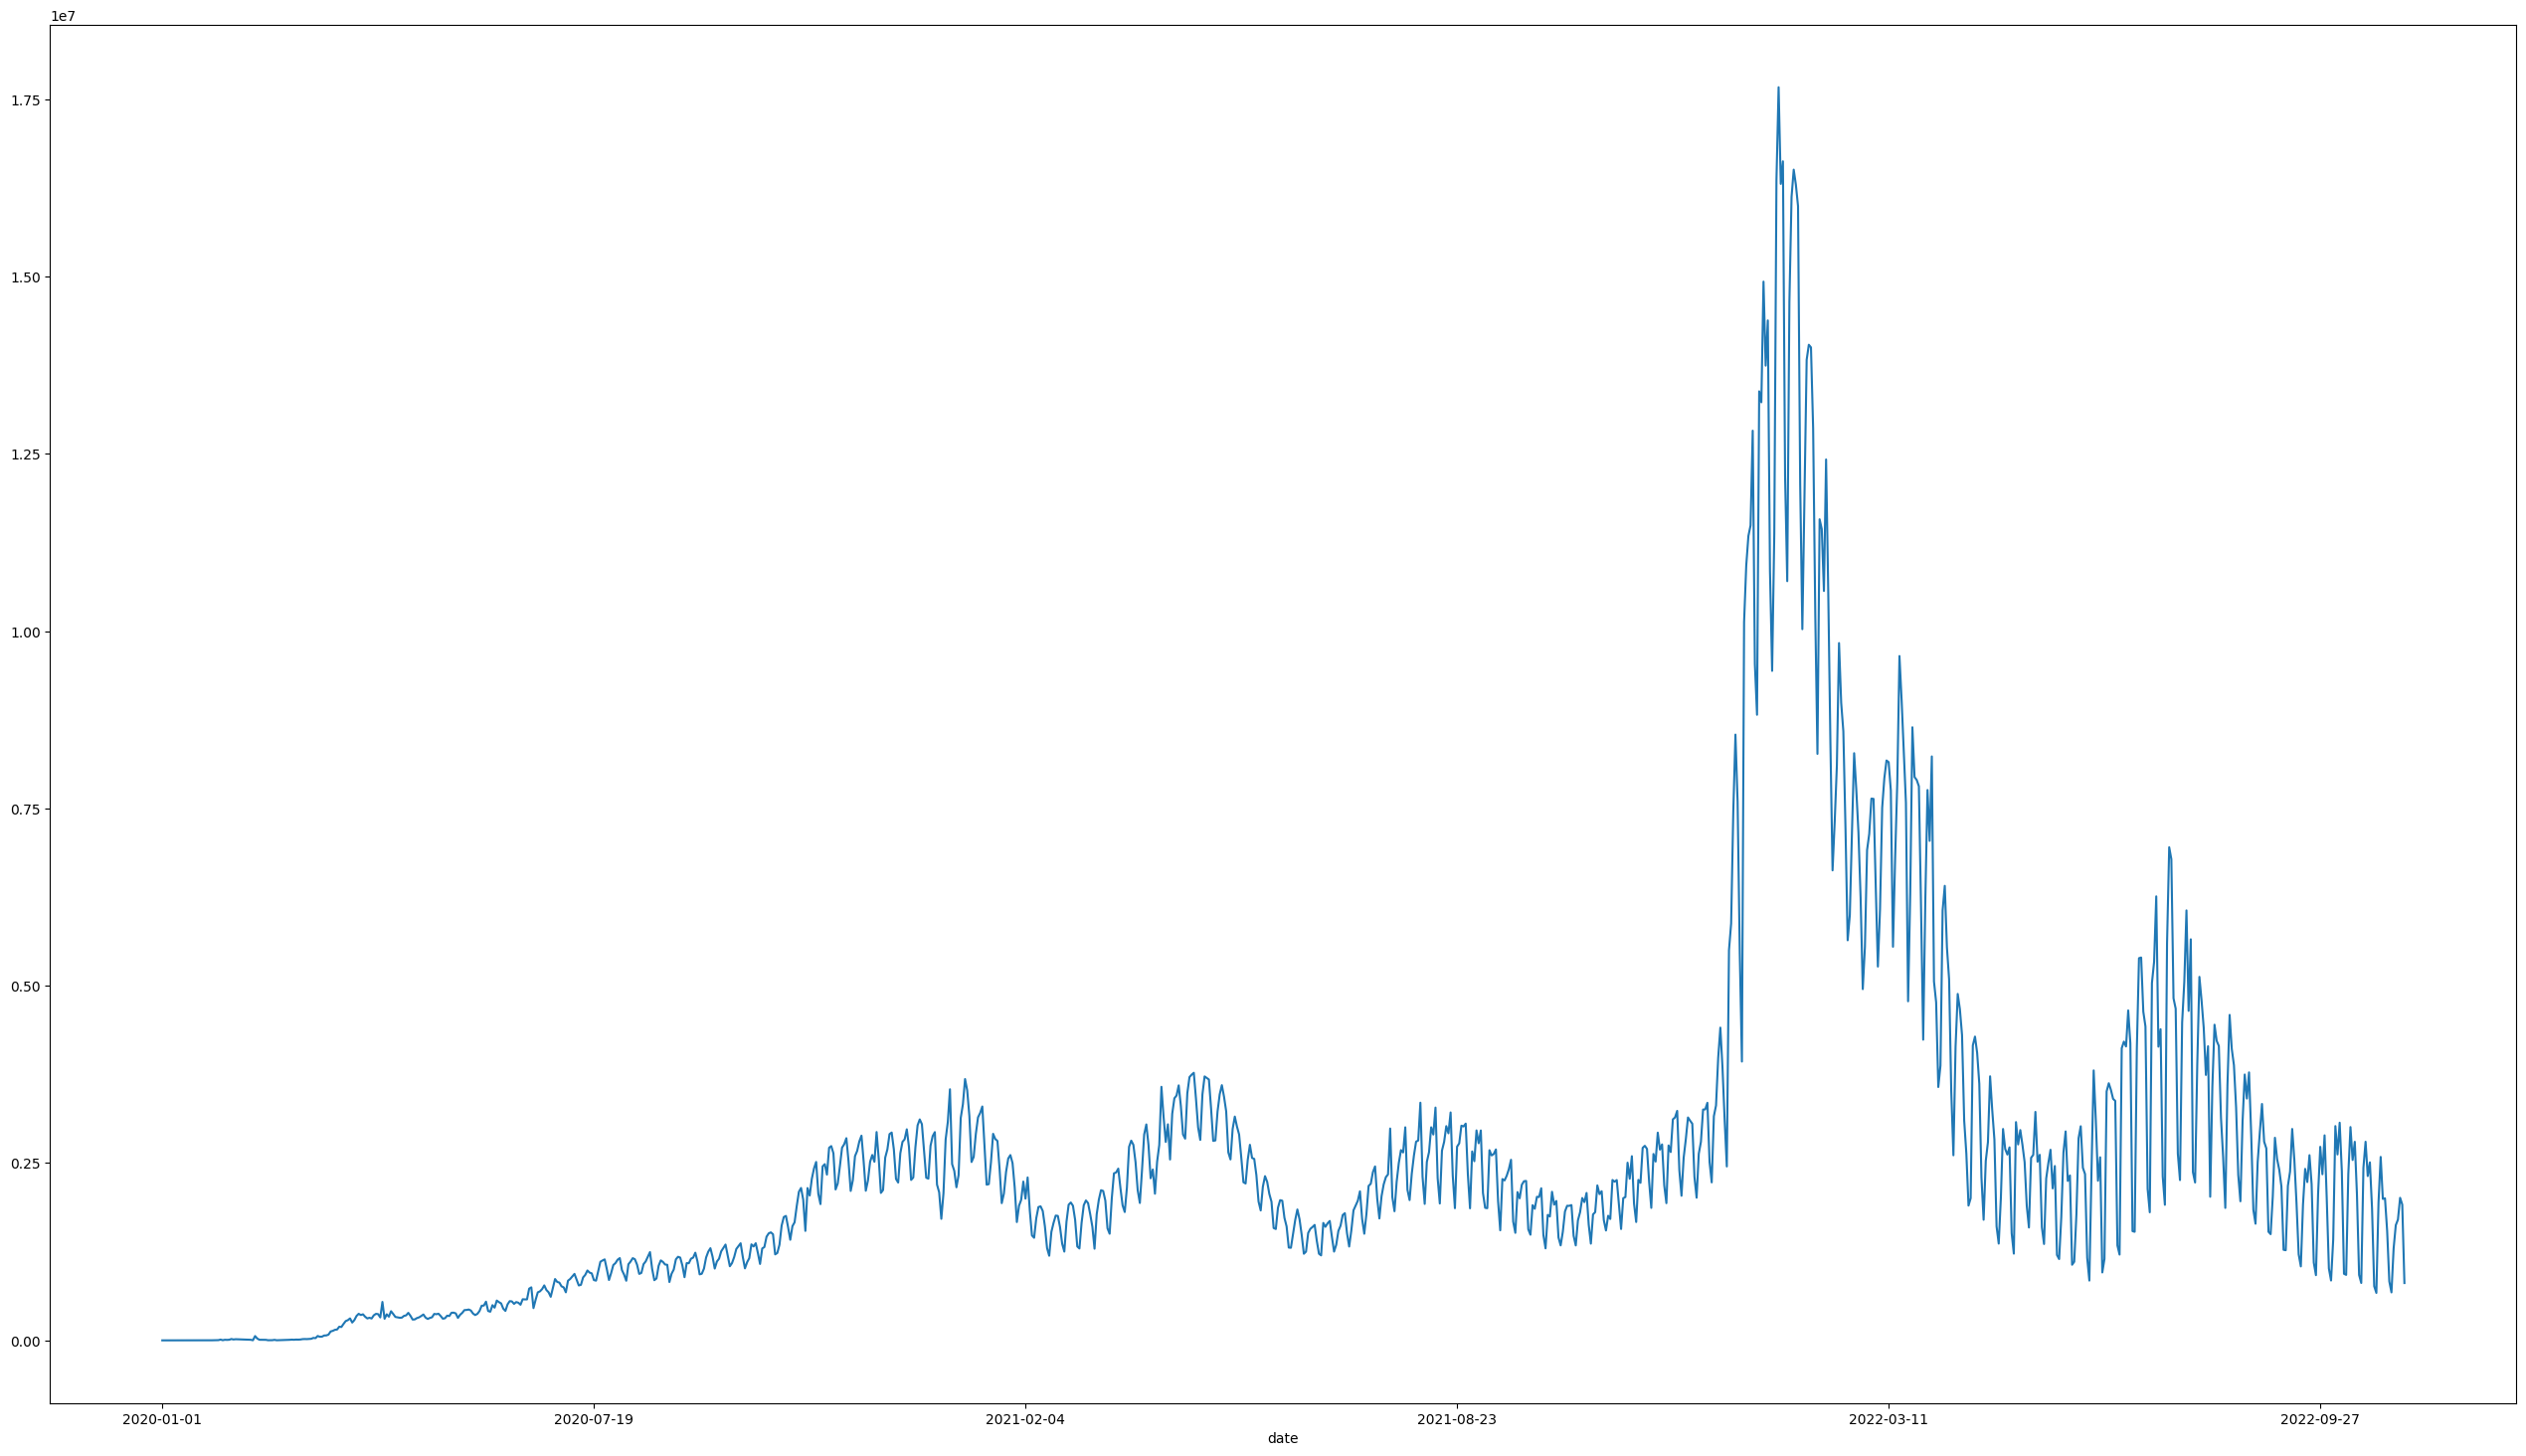

In [24]:
fig = plt.figure(figsize=(32,18))

df.groupby("date")["new_cases"].sum().plot()

Analiz_2: Ülkelere göre ortalama vaka sayısı

In [26]:
df.groupby("location")["total_cases"].agg(["mean"])

,mean
location,
Afghanistan,1.057476e+05
Africa,6.176965e+06
Albania,1.483191e+05
Algeria,1.513783e+05
Andorra,1.905226e+04
...,...
Western Sahara,NaN
World,2.306839e+08
Yemen,6.806654e+03


<AxesSubplot: xlabel='location'>

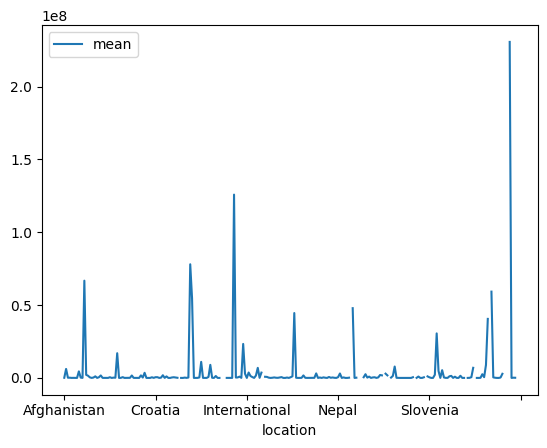

In [34]:
df.groupby("location")["total_cases"].agg(["mean"]).plot()

Analiz_3: Ülkelere göre toplam aşılama sayısı

In [27]:
df.groupby("location")["new_vaccinations_smoothed"].sum()

location
Afghanistan       1.210011e+07
Africa            6.780803e+08
Albania           2.989876e+06
Algeria           1.527091e+07
Andorra           1.539270e+05
                      ...     
Western Sahara    0.000000e+00
World             1.288956e+10
Yemen             1.138152e+06
Zambia            1.208807e+07
Zimbabwe          1.222174e+07
Name: new_vaccinations_smoothed, Length: 248, dtype: float64

Grafik üzerinde inceleyelim...

<AxesSubplot: xlabel='location'>

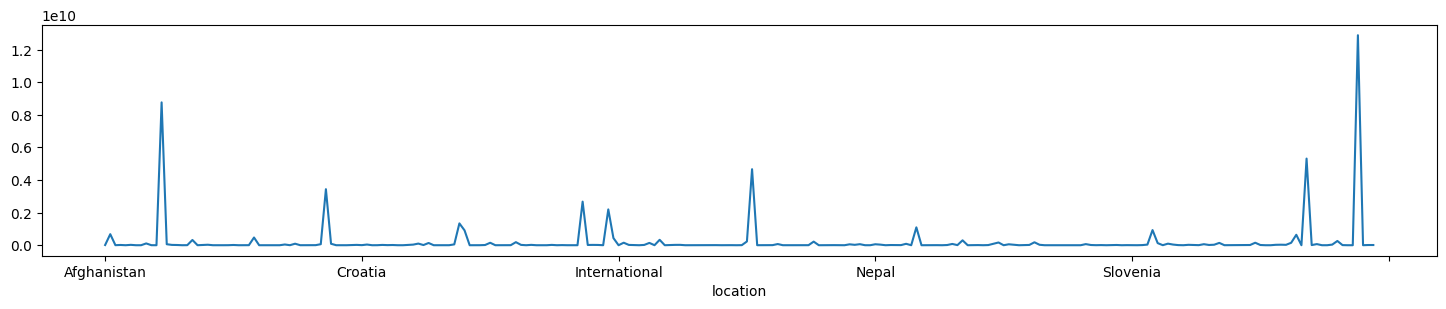

In [70]:
plt.figure(figsize=(18,3))
graph = df.groupby("location")["new_vaccinations_smoothed"].sum()
graph.plot()

Analiz_4: Günlük ortalama vaka sayısı.

In [7]:
df.groupby("date")["total_cases"].agg(["mean"])

,mean
date,
2020-01-01,NaN
2020-01-02,NaN
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
...,...
2022-11-01,1.167685e+07
2022-11-02,1.168422e+07
2022-11-03,1.169293e+07


<AxesSubplot: xlabel='date'>

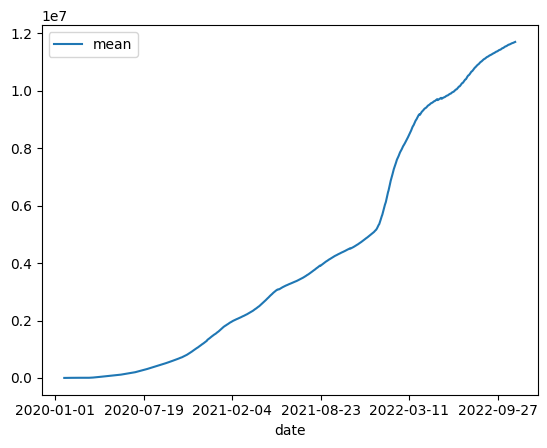

In [31]:
df.groupby("date")["total_cases"].agg(["mean"]).plot()

Analiz_5: 65 yaşından büyük vakaların toplamı.

In [32]:
df.aged_65_older.sum()

1637822.8730000001

Analiz_6: Ükelere göre toplam ölüm sayısı

In [48]:
df.groupby("location")["total_deaths"].sum()

location
Afghanistan       4.446761e+06
Africa            1.418026e+08
Albania           2.039557e+06
Algeria           4.048031e+06
Andorra           1.071030e+05
                      ...     
Western Sahara    0.000000e+00
World             3.583767e+09
Yemen             1.247730e+06
Zambia            2.131623e+06
Zimbabwe          2.761722e+06
Name: total_deaths, Length: 248, dtype: float64

<AxesSubplot: xlabel='location'>

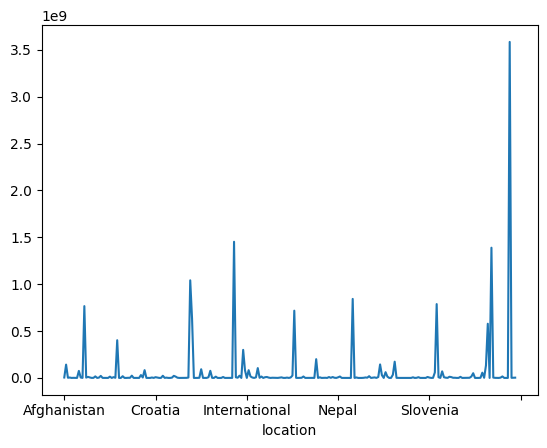

In [67]:
df.groupby("location")["total_deaths"].sum().plot()